# Microseismic data

In [1]:
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

from obspy import read
import numpy as np
import matplotlib.pyplot as plt


In [2]:
datahome = '/Users/glyjw/Downloads/20130806_040535/S_Well/'
st = read(datahome + '20130806.040535.S_Well.015.?')

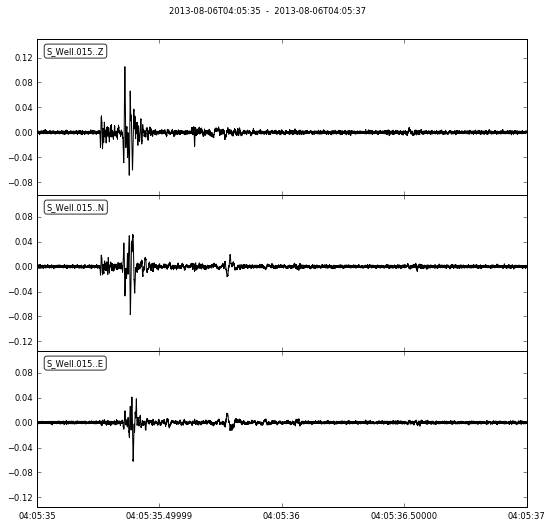

In [3]:
st.plot()

In [11]:
st[0].stats.sac['t1']

0.35075003

In [17]:
delta = st[0].stats.delta
t = sw.Trio(st[1].data,st[2].data,st[0].data,delta=delta)
w = sw.Window()

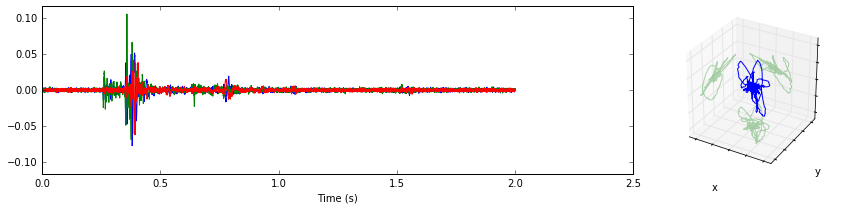

In [18]:
t.plot()

In [22]:
st[0].stats.starttime + st[0].stats.sac['t0']

2013-08-06T04:05:35.255750Z

In [24]:
st[0].stats.starttime

2013-08-06T04:05:35.000000Z

In [30]:
st.trim?

In [33]:
s = st.copy()
stime = s[0].stats.starttime + s[0].stats.sac['t1']
s.trim(stime-0.1,stime+0.1)

3 Trace(s) in Stream:
S_Well.015..E | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples
S_Well.015..N | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples
S_Well.015..Z | 2013-08-06T04:05:35.250750Z - 2013-08-06T04:05:35.450750Z | 4000.0 Hz, 801 samples

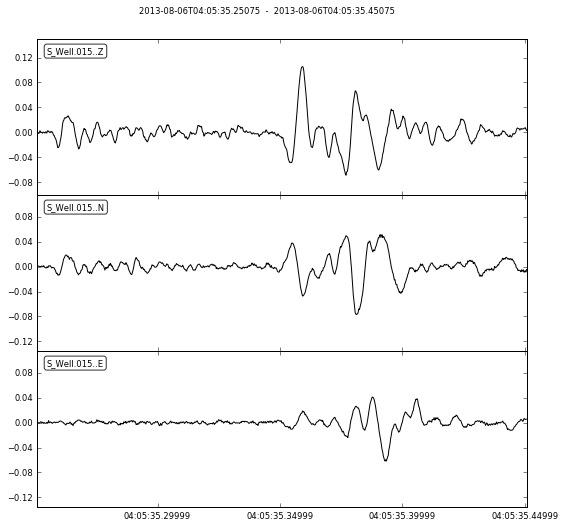

In [43]:
s.plot()
t = sw.Trio(s[1].data,s[2].data,s[0].data)
w = sw.Window(101,20)

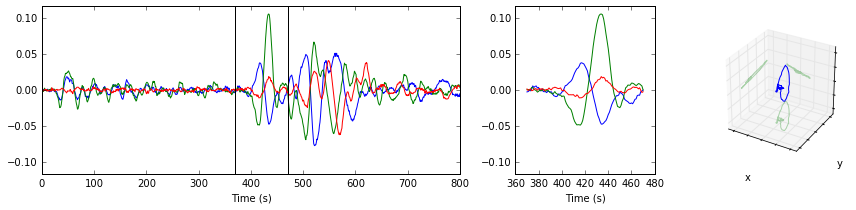

In [44]:
t.plot(window=w)

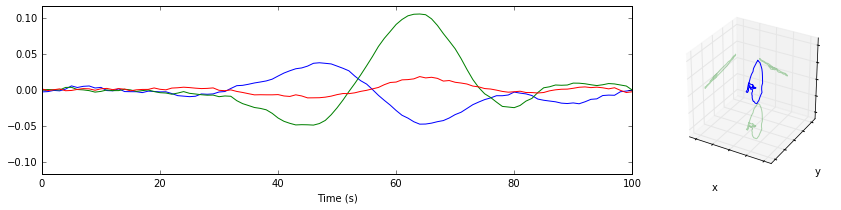

In [47]:
tchop = t.copy()
tchop.chop(w)
tchop.plot()

In [51]:
cov = np.cov(np.vstack((tchop.x,tchop.y,tchop.z)))
eigval, eigvec = np.linalg.eig(cov)

In [53]:
eigvec

array([[ 0.41591108, -0.89448776,  0.16404151],
       [-0.89752921, -0.432803  , -0.08439721],
       [-0.14648993,  0.11213031,  0.98283645]])

In [57]:
p = sw.Pair(t.x,t.y,delta=delta,window=w)
p.plot(window=w)

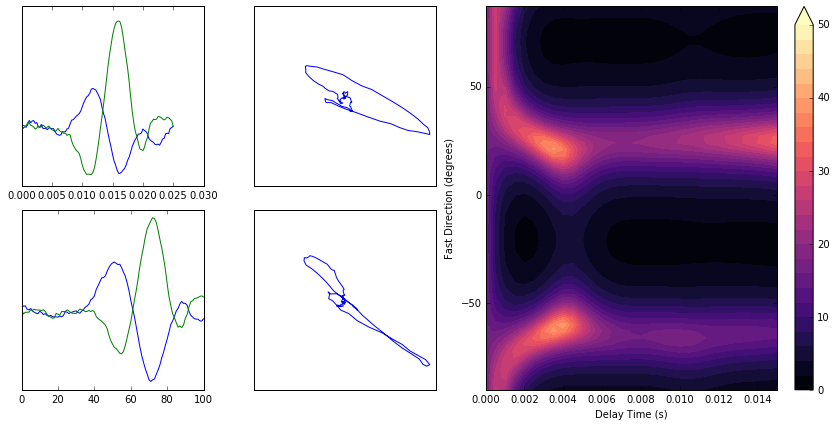

In [66]:
m = sw.EigenM(p,window=w,tlags=np.linspace(0,0.015,41))
m.plot()

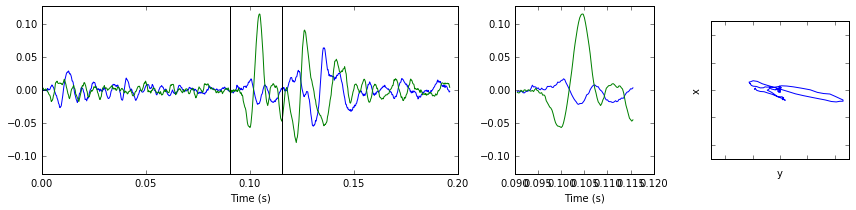

In [77]:
pc=p.copy()
# pc.plot(window=w)
pc.unsplit(20,0.004)
# pc.unsplit(-60,0.004)
pc.plot(window=w)